# Restaurant Food Cost

# Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

# You are provided with following 2 files:

1. train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
    
2. test.csv : Use the trained model to predict the cost of a two person meal.

# Dataset Attributes

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.
                          
CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.
    
RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

# Dataset Link

•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import re

In [12]:
restfoodtraindf=pd.read_excel(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\Data_Train.xlsx')
restfoodtestdf=pd.read_excel(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\Data_Test.xlsx')

In [14]:
restfoodtraindf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [16]:
restfoodtestdf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [18]:
restfoodtraindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [20]:
restfoodtraindf.shape

(12690, 9)

In [22]:
restfoodtraindf.duplicated().sum()

25

In [24]:
restfoodtraindf=restfoodtraindf.drop_duplicates()

In [26]:
restfoodtraindf.duplicated().sum()

0

In [28]:
restfoodtraindf.isnull().sum()

TITLE            1000
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [30]:
restfoodtraindf['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [32]:
restfoodtraindf.dropna(subset=['TITLE','CITY'],inplace=True)

In [34]:
restfoodtraindf.shape

(11632, 9)

In [36]:
restfoodtraindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11632 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11632 non-null  object
 1   RESTAURANT_ID  11632 non-null  int64 
 2   CUISINES       11632 non-null  object
 3   TIME           11632 non-null  object
 4   CITY           11632 non-null  object
 5   LOCALITY       11632 non-null  object
 6   RATING         11630 non-null  object
 7   VOTES          10574 non-null  object
 8   COST           11632 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 908.8+ KB


In [38]:
restfoodtraindf['RATING']=restfoodtraindf['RATING'].str.replace('-','0.1').str.replace('NEW','0')

In [40]:
restfoodtraindf['RATING']=pd.to_numeric(restfoodtraindf['RATING'])

In [42]:
restfoodtraindf['VOTES']=restfoodtraindf['VOTES'].str.split(' ').str[0]

In [44]:
restfoodtraindf['VOTES']=pd.to_numeric(restfoodtraindf['VOTES'])

In [46]:
restfoodtraindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11632 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          11632 non-null  object 
 1   RESTAURANT_ID  11632 non-null  int64  
 2   CUISINES       11632 non-null  object 
 3   TIME           11632 non-null  object 
 4   CITY           11632 non-null  object 
 5   LOCALITY       11632 non-null  object 
 6   RATING         11630 non-null  float64
 7   VOTES          10574 non-null  float64
 8   COST           11632 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 908.8+ KB


In [48]:
restfoodtraindf['RATING']=restfoodtraindf['RATING'].fillna(value=0.0)

In [50]:
restfoodtraindf['VOTES']=restfoodtraindf['VOTES'].fillna(value=0.0)

In [52]:
restfoodtraindf.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [54]:
restfoodtraindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11632 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          11632 non-null  object 
 1   RESTAURANT_ID  11632 non-null  int64  
 2   CUISINES       11632 non-null  object 
 3   TIME           11632 non-null  object 
 4   CITY           11632 non-null  object 
 5   LOCALITY       11632 non-null  object 
 6   RATING         11632 non-null  float64
 7   VOTES          11632 non-null  float64
 8   COST           11632 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 908.8+ KB


In [56]:
restfoodtraindf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


In [58]:
restfoodtraindf=restfoodtraindf.drop(columns='TIME',axis=1)

In [60]:
restfoodtraindf=restfoodtraindf.drop(columns=['CITY','LOCALITY'],axis=1)

In [62]:
restfoodtraindf.head()

,TITLE,RESTAURANT_ID,CUISINES,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,3.8,165.0,300


In [64]:
restfoodtraindf['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR',
      

In [66]:
restfoodtraindf['TITLE']=restfoodtraindf['TITLE'].str.split(',').str[0]

In [68]:
restfoodtraindf.head()

,TITLE,RESTAURANT_ID,CUISINES,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",3.6,49.0,1200
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,3.8,165.0,300


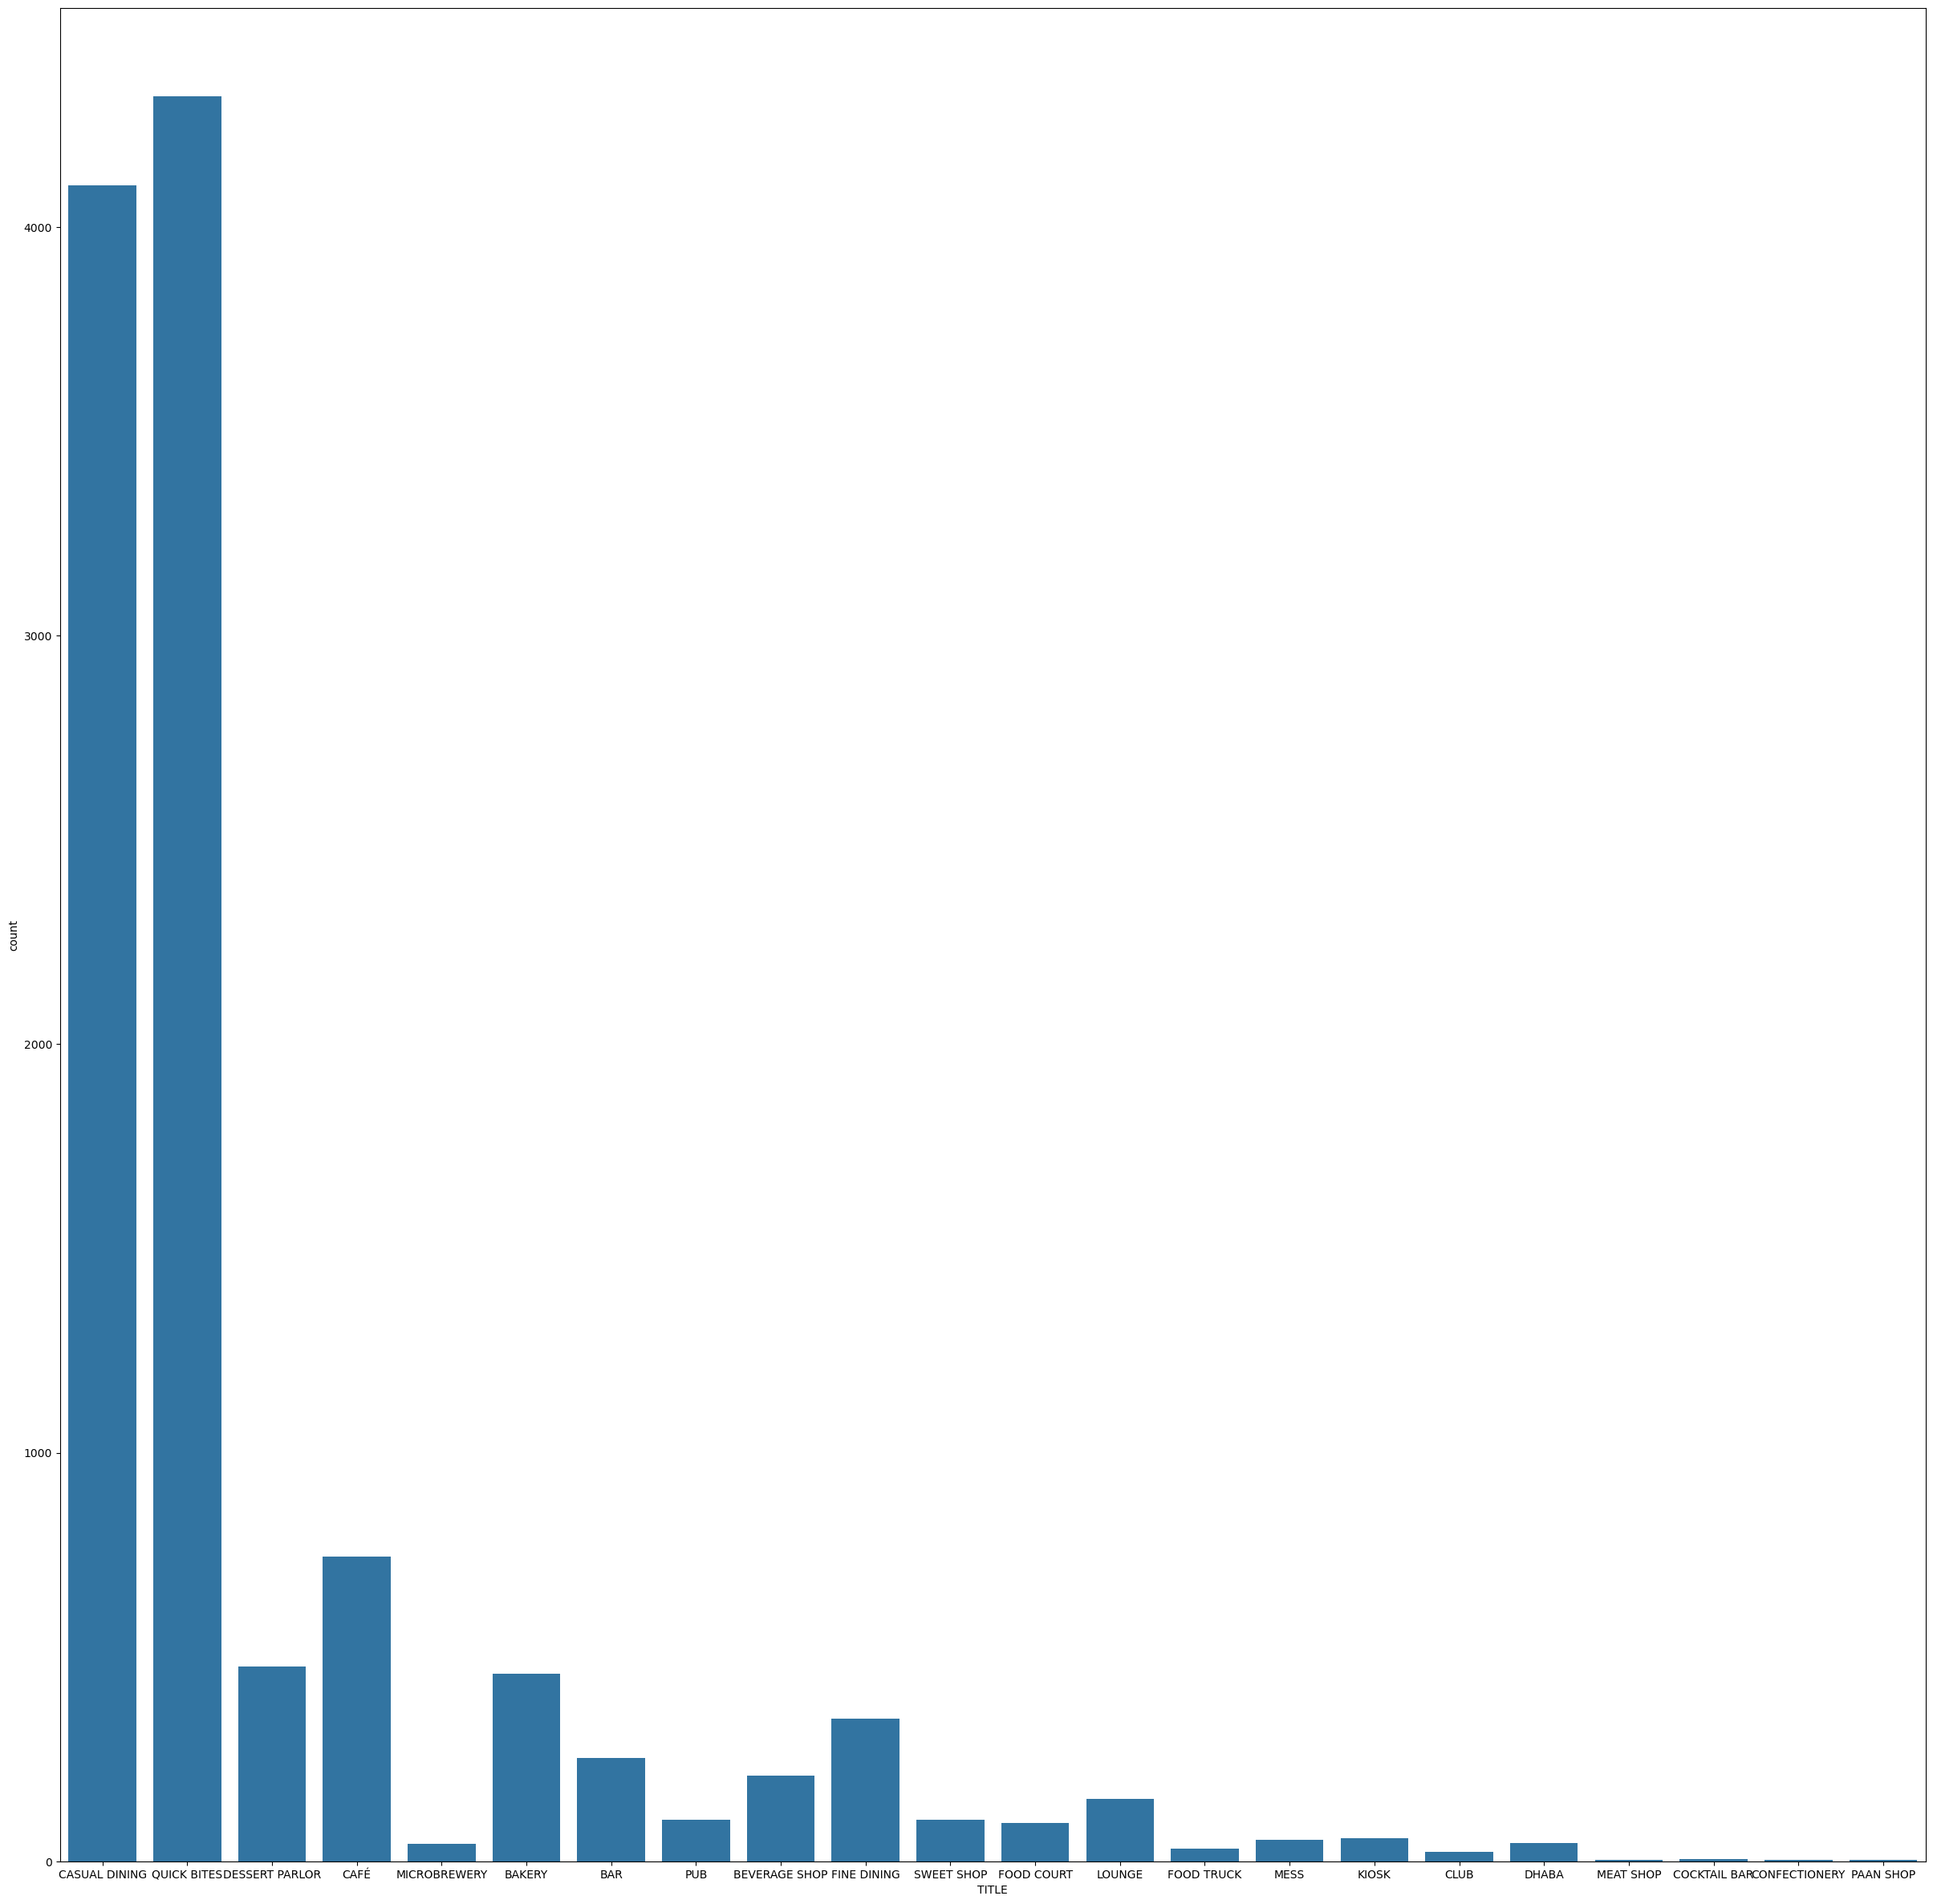

In [70]:
plt.figure(figsize=(30,30))
sns.countplot(restfoodtraindf,x='TITLE')
plt.show()

# Scatterplot to get the relationship between average ratings of the food by customer and average cost of two person meal

<Axes: xlabel='RATING', ylabel='COST'>

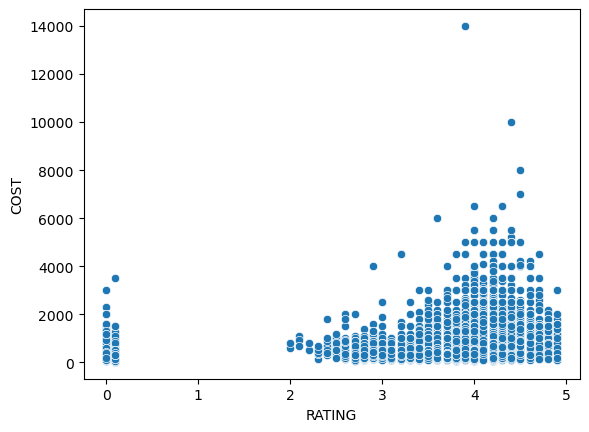

In [75]:
sns.scatterplot(restfoodtraindf,x='RATING',y='COST')

# Scatterplot to get the relationship between votes for the food by customer and average cost of two person meal

<Axes: xlabel='VOTES', ylabel='COST'>

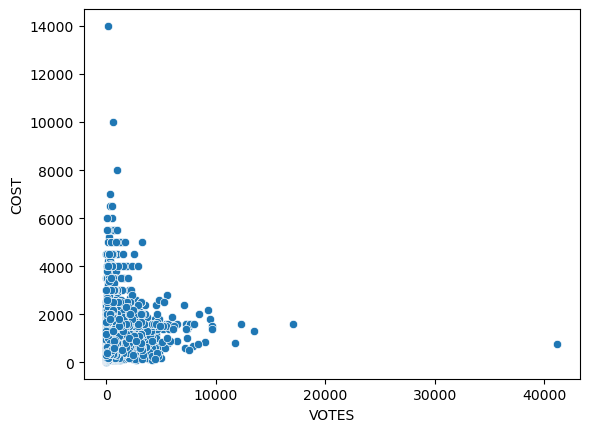

In [81]:
sns.scatterplot(restfoodtraindf,x='VOTES',y='COST')

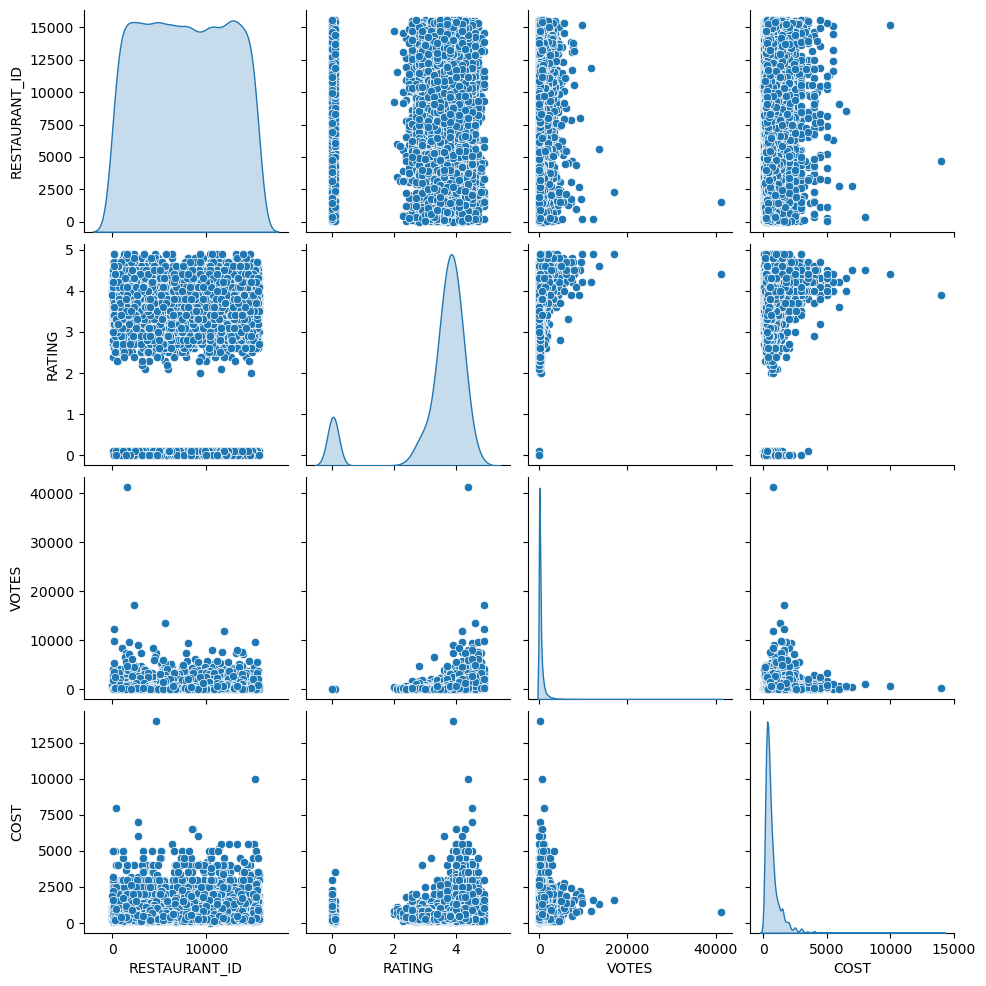

In [83]:
sns.pairplot(restfoodtraindf,diag_kind='kde')

# Stripplot to get the relationship between title and average cost of two person meal

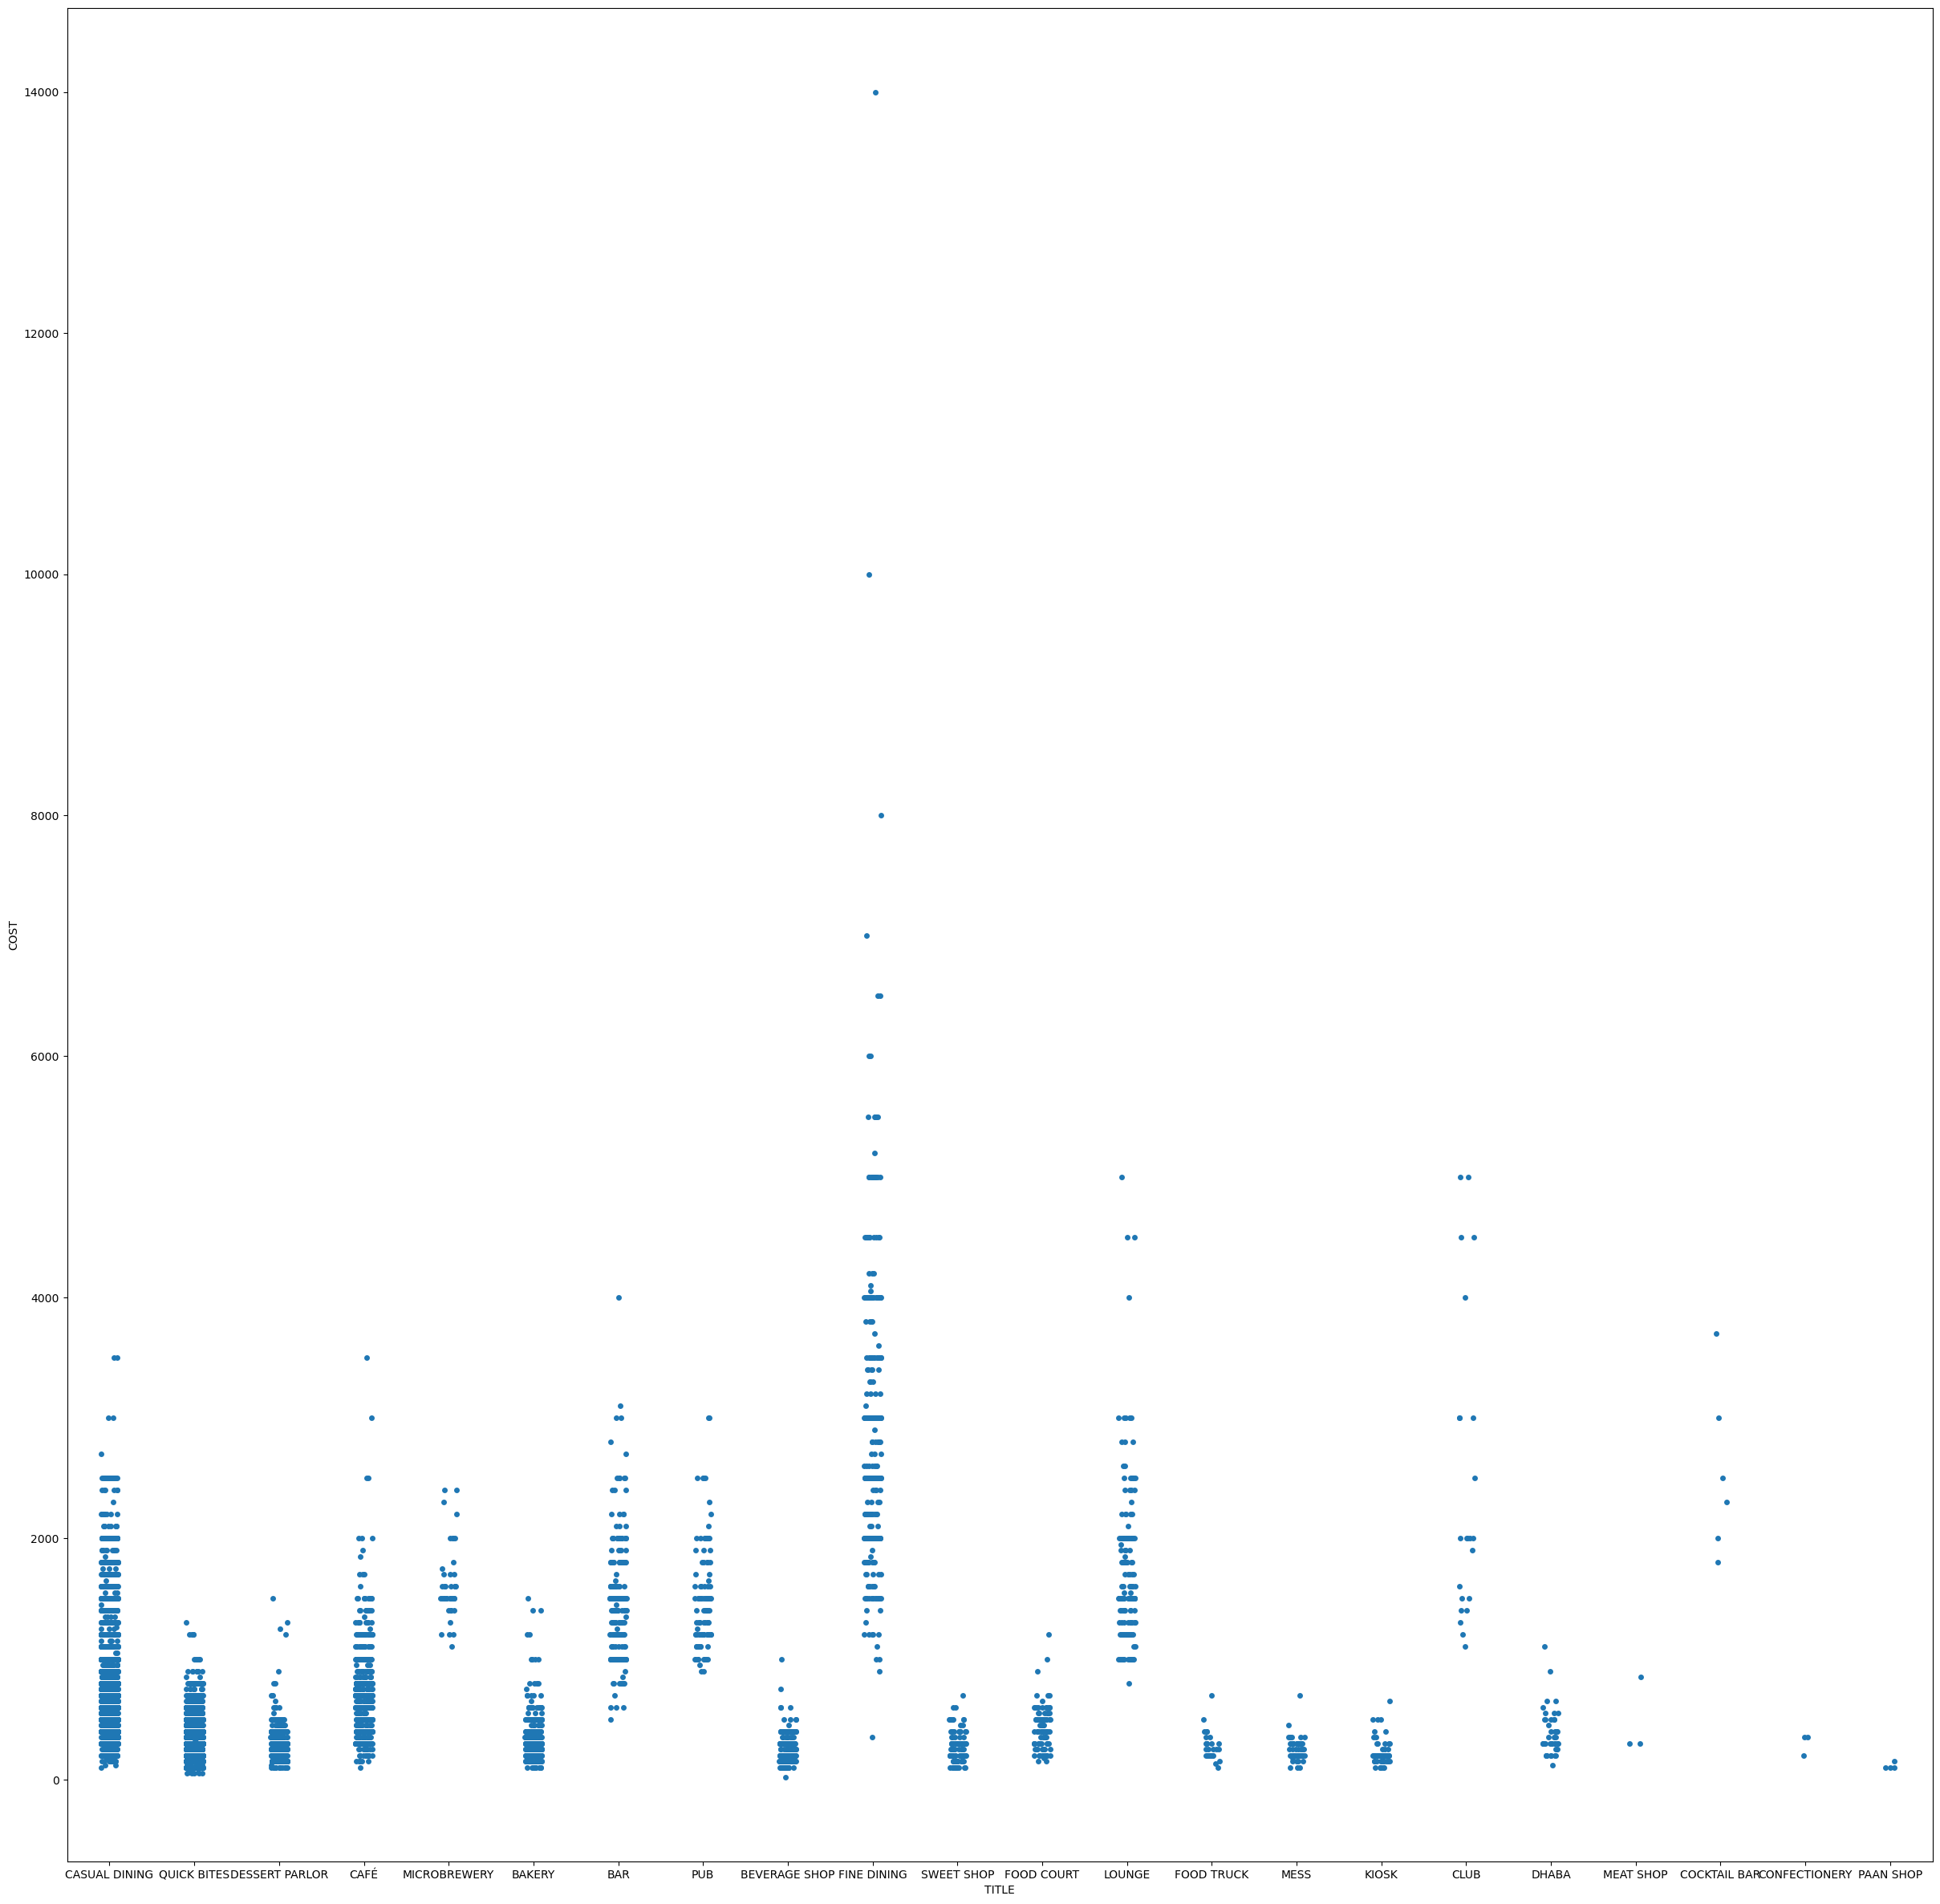

In [86]:
plt.figure(figsize=(30,30))
sns.stripplot(restfoodtraindf,x='TITLE',y='COST')
plt.show()

In [88]:
restfoodtraindf=restfoodtraindf.drop(columns='CUISINES',axis=1)

In [90]:
restfoodtraindf.head()

,TITLE,RESTAURANT_ID,RATING,VOTES,COST
0,CASUAL DINING,9438,3.6,49.0,1200
1,CASUAL DINING,13198,4.2,30.0,1500
2,CASUAL DINING,10915,3.8,221.0,800
3,QUICK BITES,6346,4.1,24.0,800
4,DESSERT PARLOR,15387,3.8,165.0,300


In [92]:
le=LabelEncoder()
restfoodtraindf['TITLE']=le.fit_transform(restfoodtraindf['TITLE'])
restfoodtraindf.head()

,TITLE,RESTAURANT_ID,RATING,VOTES,COST
0,4,9438,3.6,49.0,1200
1,4,13198,4.2,30.0,1500
2,4,10915,3.8,221.0,800
3,20,6346,4.1,24.0,800
4,8,15387,3.8,165.0,300


In [94]:
restfoodtraindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11632 entries, 0 to 12689
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          11632 non-null  int32  
 1   RESTAURANT_ID  11632 non-null  int64  
 2   RATING         11632 non-null  float64
 3   VOTES          11632 non-null  float64
 4   COST           11632 non-null  int64  
dtypes: float64(2), int32(1), int64(2)
memory usage: 499.8 KB


In [96]:
restfoodtraindf.shape

(11632, 5)

In [98]:
restfoodtraindf.duplicated().sum()

1

In [100]:
restfoodtraindf=restfoodtraindf.drop_duplicates()

In [102]:
restfoodtraindf.describe()

,TITLE,RESTAURANT_ID,RATING,VOTES,COST
count,11631.000000,11631.000000,11631.000000,11631.000000,11631.000000
mean,10.629353,7748.410627,3.444149,390.883587,676.038260
std,7.880694,4502.985227,1.147974,839.974513,646.914693
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,4.000000,3838.500000,3.400000,41.000000,300.000000
50%,8.000000,7726.000000,3.800000,137.000000,500.000000
75%,20.000000,11683.500000,4.000000,420.000000,800.000000
max,21.000000,15569.000000,4.900000,41186.000000,14000.000000


In [104]:
restfoodtraindf.duplicated().sum()

0

# Heatmap to get the correlation between each features in the dataset

<Axes: >

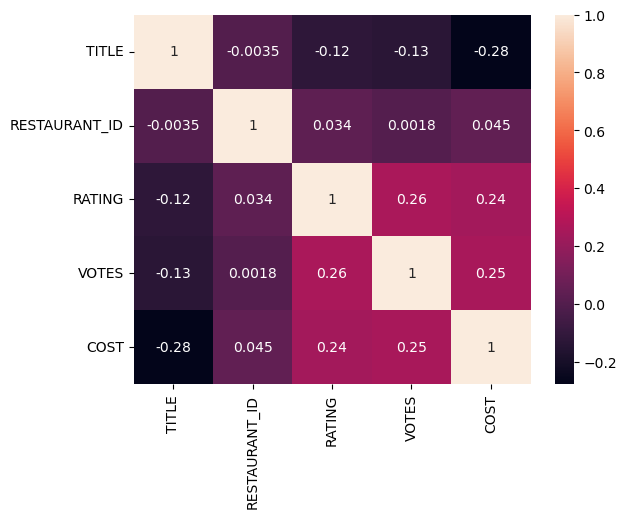

In [109]:
sns.heatmap(restfoodtraindf.corr(),annot=True)

# Check for the skewess in the dataset using distplot

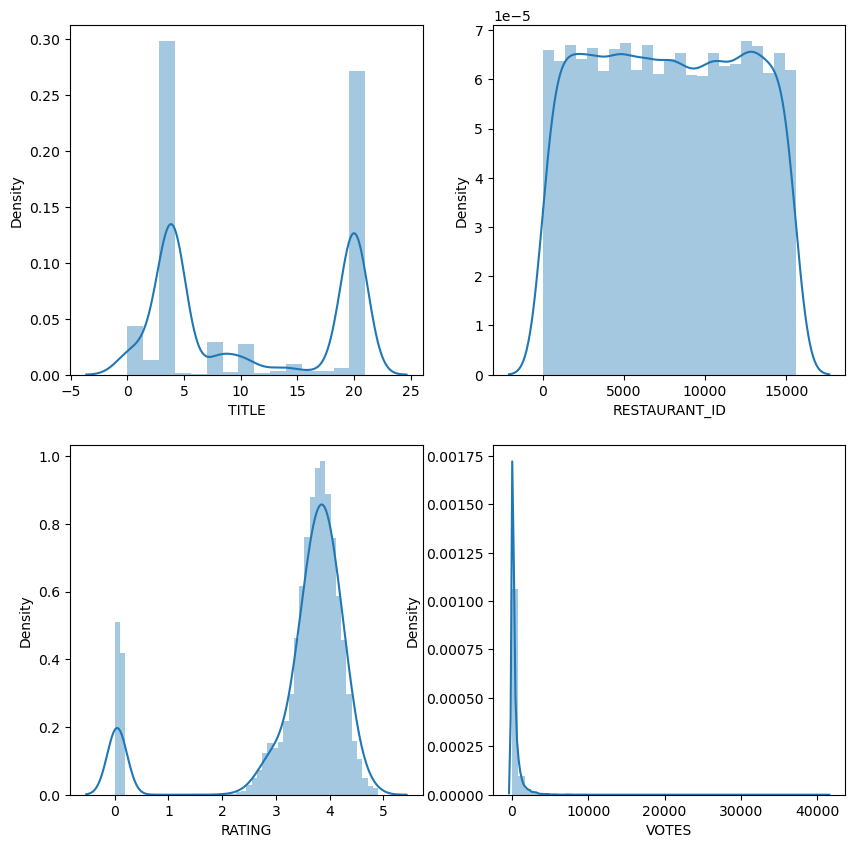

In [113]:
plt.figure(figsize=(10,10))
p=1
for i in restfoodtraindf:
    if p<=4:
        plt.subplot(2,2,p)
        sns.distplot(restfoodtraindf[i])
    p=p+1
plt.show()

In [115]:
restfoodtraindf.skew()

TITLE             0.229263
RESTAURANT_ID     0.009025
RATING           -2.251533
VOTES            14.198589
COST              3.860094
dtype: float64

In [117]:
restfoodtraindf['RATING']=np.exp(restfoodtraindf['RATING'])
restfoodtraindf['VOTES']=np.cbrt(restfoodtraindf['VOTES'])
restfoodtraindf['COST']=boxcox(restfoodtraindf['COST'],0)

In [119]:
restfoodtraindf.skew()

TITLE            0.229263
RESTAURANT_ID    0.009025
RATING           0.228686
VOTES            0.748072
COST             0.372825
dtype: float64

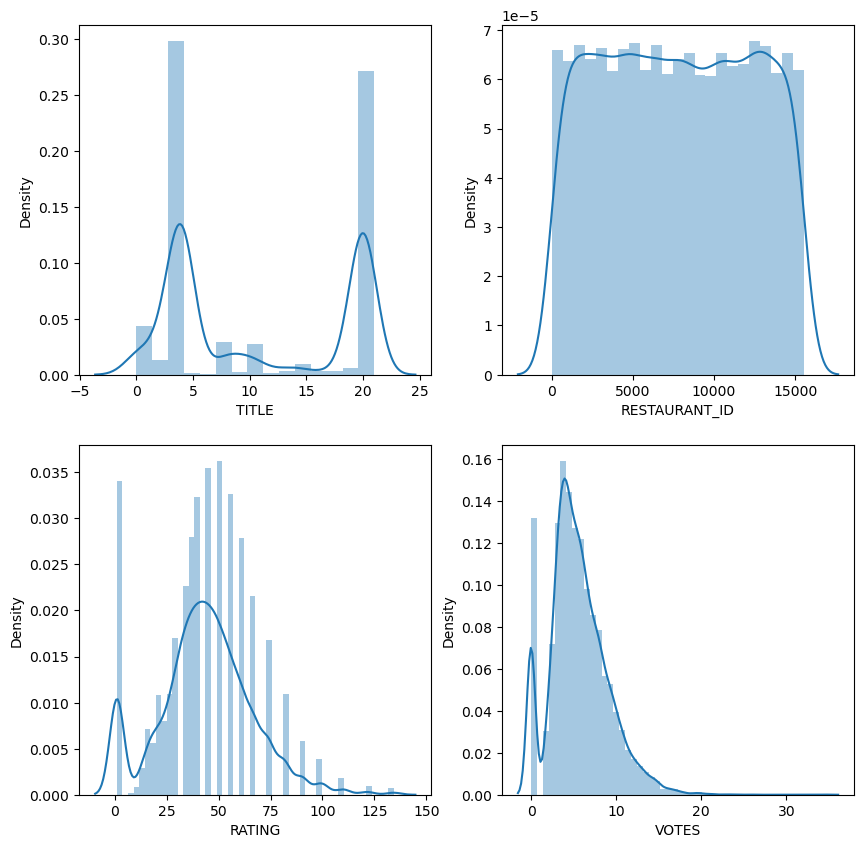

In [121]:
plt.figure(figsize=(10,10))
p=1
for i in restfoodtraindf:
    if p<=4:
        plt.subplot(2,2,p)
        sns.distplot(restfoodtraindf[i])
    p=p+1
plt.show()

# check for the outliers in the dataset

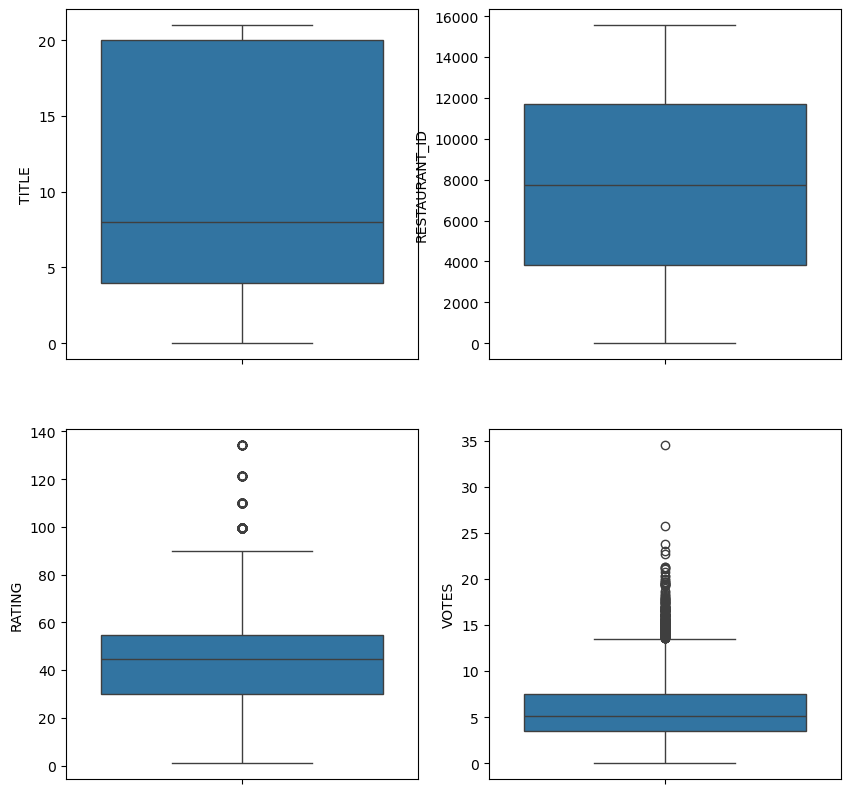

In [126]:
plt.figure(figsize=(10,10))
p=1
for i in restfoodtraindf:
    if p<=4:
        plt.subplot(2,2,p)
        sns.boxplot(restfoodtraindf[i])
    p=p+1
plt.show()

In [128]:
z=np.abs(zscore(restfoodtraindf))
z

,TITLE,RESTAURANT_ID,RATING,VOTES,COST
0,0.841250,0.375232,0.307326,0.569062,1.181640
1,0.841250,1.210269,1.018580,0.733164,1.486068
2,0.841250,0.703250,0.049750,0.140362,0.628475
3,1.189115,0.311454,0.738926,0.799372,0.628475
4,0.333659,1.696412,0.049750,0.026435,0.709644
...,...,...,...,...,...
12685,1.189115,1.216932,0.049750,0.772715,0.012739
12686,0.841250,0.430308,1.327645,1.514186,1.734805
12687,0.427728,0.751665,0.485884,0.861398,1.290840
12688,0.841250,0.358535,0.460803,0.713079,0.317167


In [130]:
np.where(z>=3)

(array([  172,   182,   218,   266,   277,   306,   313,   391,   541,
          672,   786,   841,   850,   919,   953,  1055,  1059,  1060,
         1092,  1146,  1146,  1300,  1340,  1347,  1352,  1353,  1478,
         1750,  1765,  2010,  2020,  2072,  2105,  2320,  2460,  2509,
         2558,  2646,  2725,  2877,  2926,  2929,  2943,  3014,  3029,
         3116,  3116,  3256,  3289,  3334,  3347,  3361,  3402,  3542,
         3561,  3561,  3639,  3650,  3663,  3785,  3859,  4187,  4205,
         4205,  4218,  4251,  4255,  4269,  4312,  4329,  4329,  4347,
         4349,  4384,  4423,  4538,  4589,  4669,  4670,  4697,  4726,
         4940,  5051,  5195,  5313,  5414,  5460,  5482,  5520,  5637,
         5649,  5940,  5943,  5973,  5974,  5987,  6068,  6144,  6144,
         6164,  6166,  6206,  6206,  6247,  6369,  6454,  6460,  6576,
         6664,  6719,  6832,  6844,  7095,  7152,  7241,  7306,  7342,
         7342,  7423,  7449,  7485,  7718,  7764,  7822,  7823,  7886,
      

In [132]:
restfoodtrain_df=restfoodtraindf[(z<=3).all(axis=1)]
restfoodtrain_df.head()

,TITLE,RESTAURANT_ID,RATING,VOTES,COST
0,4,9438,36.598234,3.659306,7.090077
1,4,13198,66.686331,3.107233,7.313220
2,4,10915,44.701184,6.045944,6.684612
3,20,6346,60.340288,2.884499,6.684612
4,8,15387,44.701184,5.484807,5.703782


In [134]:
restfoodtrain_df.shape

(11462, 5)

In [136]:
restfoodtraindf.shape

(11631, 5)

In [138]:
print("Percentage of data loss",((restfoodtraindf.shape[0]-restfoodtrain_df.shape[0])/restfoodtraindf.shape[0])*100)

Percentage of data loss 1.4530134984094232


In [140]:
x=restfoodtrain_df.drop(columns='COST',axis=1)
x.head()

,TITLE,RESTAURANT_ID,RATING,VOTES
0,4,9438,36.598234,3.659306
1,4,13198,66.686331,3.107233
2,4,10915,44.701184,6.045944
3,20,6346,60.340288,2.884499
4,8,15387,44.701184,5.484807


In [142]:
y=restfoodtrain_df['COST']
y.head()

0    7.090077
1    7.313220
2    6.684612
3    6.684612
4    5.703782
Name: COST, dtype: float64

In [144]:
#StandardScaler
sc=StandardScaler()
x_scale=sc.fit_transform(x)
x_scaled=pd.DataFrame(x_scale,columns=x.columns)
x_scaled.head()

,TITLE,RESTAURANT_ID,RATING,VOTES
0,-0.843282,0.374994,-0.288768,-0.566629
1,-0.843282,1.210827,1.090547,-0.740934
2,-0.843282,0.703325,0.082692,0.186899
3,1.182698,-0.312345,0.799628,-0.811257
4,-0.336787,1.697432,0.082692,0.009732


# Data preprocessing for test dataset

In [147]:
# Test data
restfoodtestdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3947 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [149]:
restfoodtestdf.isnull().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [151]:
restfoodtestdf.duplicated().sum()

1

In [153]:
restfoodtestdf=restfoodtestdf.drop_duplicates()

In [155]:
restfoodtestdf.duplicated().sum()

0

In [157]:
restfoodtestdf['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2', nan], dtype=object)

In [159]:
restfoodtestdf.dropna(subset=['TITLE','CITY'],inplace=True)

In [161]:
restfoodtestdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3931 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3931 non-null   object
 1   RESTAURANT_ID  3931 non-null   int64 
 2   CUISINES       3931 non-null   object
 3   TIME           3931 non-null   object
 4   CITY           3931 non-null   object
 5   LOCALITY       3931 non-null   object
 6   RATING         3930 non-null   object
 7   VOTES          3556 non-null   object
dtypes: int64(1), object(7)
memory usage: 276.4+ KB


In [163]:
restfoodtestdf.shape

(3931, 8)

In [165]:
restfoodtestdf['RATING']=restfoodtestdf['RATING'].str.replace('-','0.1').str.replace('NEW','0')

In [167]:
restfoodtestdf['RATING']=pd.to_numeric(restfoodtestdf['RATING'])

In [169]:
restfoodtestdf['VOTES']=restfoodtestdf['VOTES'].str.split(' ').str[0]

In [171]:
restfoodtestdf['VOTES']=pd.to_numeric(restfoodtestdf['VOTES'])

In [173]:
restfoodtestdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3931 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          3931 non-null   object 
 1   RESTAURANT_ID  3931 non-null   int64  
 2   CUISINES       3931 non-null   object 
 3   TIME           3931 non-null   object 
 4   CITY           3931 non-null   object 
 5   LOCALITY       3931 non-null   object 
 6   RATING         3930 non-null   float64
 7   VOTES          3556 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 276.4+ KB


In [175]:
restfoodtestdf['RATING']=restfoodtestdf['RATING'].fillna(value=0.0)

In [177]:
restfoodtestdf['VOTES']=restfoodtestdf['VOTES'].fillna(value=0.0)

In [179]:
restfoodtestdf=restfoodtestdf.drop(columns='TIME',axis=1)

In [181]:
restfoodtestdf=restfoodtestdf.drop(columns=['CITY','LOCALITY'],axis=1)

In [183]:
restfoodtestdf['TITLE'].unique()

array(['CASUAL DINING', 'QUICK BITES', 'FOOD TRUCK,DESSERT PARLOR',
       'DESSERT PARLOR,QUICK BITES', 'CASUAL DINING,BAR', 'LOUNGE',
       'BEVERAGE SHOP', 'CASUAL DINING,PUB', 'DESSERT PARLOR', 'PUB',
       'CAFÉ', 'BAKERY', 'LOUNGE,BAR', 'BAKERY,QUICK BITES', 'SWEET SHOP',
       'SWEET SHOP,QUICK BITES', 'BEVERAGE SHOP,QUICK BITES',
       'CAFÉ,QUICK BITES', 'DHABA', 'QUICK BITES,DESSERT PARLOR',
       'FINE DINING', 'IRANI CAFE,BAKERY', 'PUB,CASUAL DINING',
       'BAKERY,CASUAL DINING', 'BAR', 'FOOD COURT',
       'QUICK BITES,SWEET SHOP', 'CAFÉ,BAR', 'BAR,PUB',
       'BAKERY,DESSERT PARLOR', 'KIOSK', 'CAFÉ,BAKERY',
       'CASUAL DINING,BAKERY', 'BAKERY,CAFÉ', 'CASUAL DINING,CAFÉ',
       'QUICK BITES,CAFÉ', 'MESS', 'BAR,CASUAL DINING',
       'BEVERAGE SHOP,CAFÉ', 'BEVERAGE SHOP,DESSERT PARLOR',
       'PUB,FINE DINING', 'CASUAL DINING,FOOD COURT',
       'CAFÉ,CASUAL DINING', 'LOUNGE,CASUAL DINING',
       'DESSERT PARLOR,CAFÉ', 'FINE DINING,BAR',
       'CASUAL DINING,

In [185]:
restfoodtestdf['TITLE']=restfoodtestdf['TITLE'].str.split(',').str[0]

In [187]:
restfoodtestdf.head()

,TITLE,RESTAURANT_ID,CUISINES,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",4.3,564.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",4.2,61.0
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",3.8,350.0
4,QUICK BITES,13453,"South Indian, Kerala",3.6,23.0
5,FOOD TRUCK,4518,"Ice Cream, Desserts",3.7,36.0


In [189]:
restfoodtestdf=restfoodtestdf.drop(columns='CUISINES',axis=1)

In [191]:
le=LabelEncoder()
restfoodtestdf['TITLE']=le.fit_transform(restfoodtestdf['TITLE'])
restfoodtestdf.head()

,TITLE,RESTAURANT_ID,RATING,VOTES
0,5,4085,4.3,564.0
1,21,12680,4.2,61.0
2,5,1411,3.8,350.0
4,21,13453,3.6,23.0
5,13,4518,3.7,36.0


In [193]:
restfoodtestdf.describe()

,TITLE,RESTAURANT_ID,RATING,VOTES
count,3931.000000,3931.000000,3931.000000,3931.000000
mean,11.584584,7798.384635,3.424141,401.575426
std,7.998928,4455.860882,1.172284,825.030594
min,0.000000,3.000000,0.000000,0.000000
25%,5.000000,3922.000000,3.400000,42.000000
50%,6.000000,7797.000000,3.800000,137.000000
75%,21.000000,11644.000000,4.000000,437.500000
max,22.000000,15572.000000,4.900000,15205.000000


In [195]:
restfoodtestdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3931 entries, 0 to 4230
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          3931 non-null   int32  
 1   RESTAURANT_ID  3931 non-null   int64  
 2   RATING         3931 non-null   float64
 3   VOTES          3931 non-null   float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 138.2 KB


In [197]:
restfoodtestdf.duplicated().sum()

1

In [199]:
restfoodtestdf=restfoodtestdf.drop_duplicates()

In [201]:
restfoodtestdf.head()

,TITLE,RESTAURANT_ID,RATING,VOTES
0,5,4085,4.3,564.0
1,21,12680,4.2,61.0
2,5,1411,3.8,350.0
4,21,13453,3.6,23.0
5,13,4518,3.7,36.0


In [203]:
restfoodtestdf.skew()

TITLE            0.195205
RESTAURANT_ID    0.000322
RATING          -2.177479
VOTES            6.891757
dtype: float64

In [205]:
restfoodtestdf['RATING']=np.exp(restfoodtestdf['RATING'])
restfoodtestdf['VOTES']=np.cbrt(restfoodtestdf['VOTES'])

In [207]:
restfoodtestdf.skew()

TITLE            0.195205
RESTAURANT_ID    0.000322
RATING           0.204239
VOTES            0.743033
dtype: float64

In [209]:
z=np.abs(zscore(restfoodtestdf))
z

,TITLE,RESTAURANT_ID,RATING,VOTES
0,0.823772,0.833928,1.321471,0.778931
1,1.177030,1.095465,1.015980,0.485126
2,0.823772,1.434183,0.058354,0.423923
4,1.177030,1.268986,0.294593,0.804418
5,0.176629,0.736729,0.126935,0.670562
...,...,...,...,...
4225,1.177030,1.376043,0.489445,0.064883
4226,0.823772,0.282179,0.263131,0.292102
4228,1.177030,0.183409,0.126935,0.537788
4229,1.177030,0.295180,1.840593,1.635462


In [211]:
np.where(z>=3)

(array([  82,  251,  345,  439,  485,  670,  699,  703, 1051, 1060, 1115,
        1167, 1210, 1565, 1565, 1616, 1650, 1650, 1726, 1846, 1866, 1937,
        1982, 2054, 2137, 2183, 2191, 2301, 2310, 2470, 2509, 2575, 2635,
        2644, 2659, 2730, 2749, 2799, 2825, 2904, 2956, 2980, 3080, 3082,
        3198, 3199, 3267, 3302, 3355, 3437, 3465, 3593, 3669, 3675, 3782,
        3830, 3854], dtype=int64),
 array([3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3,
        3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3], dtype=int64))

In [213]:
restfoodtest_df=restfoodtestdf[(z<=3).all(axis=1)]
restfoodtest_df.head()

,TITLE,RESTAURANT_ID,RATING,VOTES
0,5,4085,73.699794,8.262149
1,21,12680,66.686331,3.936497
2,5,1411,44.701184,7.047299
4,21,13453,36.598234,2.843867
5,13,4518,40.447304,3.301927


In [215]:
print("Percentage of data loss",((restfoodtestdf.shape[0]-restfoodtest_df.shape[0])/restfoodtestdf.shape[0])*100)

Percentage of data loss 1.3994910941475827


In [217]:
#StandardScaler
sc=StandardScaler()
x_scales=sc.fit_transform(restfoodtest_df)
x_scaled_test=pd.DataFrame(x_scales,columns=restfoodtest_df.columns)
x_scaled_test.head()

,TITLE,RESTAURANT_ID,RATING,VOTES
0,-0.826476,-0.833189,1.409788,0.878631
1,1.171867,1.095672,1.091644,-0.477881
2,-0.826476,-1.433279,0.094357,0.497658
3,1.171867,1.269146,-0.273208,-0.820527
4,0.172696,-0.736017,-0.098607,-0.676880


# Instantiate different models for regression dataset

In [223]:
lr=LinearRegression()
knn=KNeighborsRegressor()
ls=Lasso()
rg=Ridge()
svr=SVR()
lsvr=LinearSVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
ada=AdaBoostRegressor()
gr=GradientBoostingRegressor()
bag=BaggingRegressor()
etr=ExtraTreesRegressor()

In [225]:
#cross val score to get the best model

models=[lr,knn,ls,rg,svr,lsvr,dtr,rfr,ada,gr,bag,etr]

for i in models:
    cvs=cross_val_score(i,x_scaled,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n Mean of the cross validation is",np.mean(cvs),"\n")

Cross validation score for LinearRegression() is [0.3230737  0.32449441 0.33376462 0.30691146 0.32118153] 
 Mean of the cross validation is 0.32188514275981406 

Cross validation score for KNeighborsRegressor() is [0.37252815 0.35621914 0.37006976 0.35393923 0.35902974] 
 Mean of the cross validation is 0.3623572039560887 

Cross validation score for Lasso() is [-3.12186029e-06 -3.23150458e-03 -7.73373941e-05 -7.82626788e-04
 -3.31043570e-04] 
 Mean of the cross validation is -0.0008851268384935107 

Cross validation score for Ridge() is [0.32307454 0.32449551 0.33376414 0.30691188 0.32117999] 
 Mean of the cross validation is 0.321885210761217 

Cross validation score for SVR() is [0.42356492 0.38574117 0.41024608 0.3888301  0.40087914] 
 Mean of the cross validation is 0.4018522814175764 

Cross validation score for LinearSVR() is [0.31975629 0.32477311 0.33261464 0.30341563 0.32104359] 
 Mean of the cross validation is 0.32032065235413465 

Cross validation score for DecisionTreeReg

In [227]:
# Get the best random state
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    gr.fit(x_train,y_train)
    y_pred=gr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuracy Score",maxacc,"random state",maxrs)

Accuracy Score 0.664887137113964 random state 52


In [229]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=52)

In [231]:
x_train.shape

(8023, 4)

In [233]:
x_test.shape

(3439, 4)

In [235]:
y_train.shape

(8023,)

In [237]:
y_test.shape

(3439,)

In [239]:
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    y_pred_train=i.score(x_train,y_train)
    print("Performance Metrics for",i)
    print("Training data Score",y_pred_train)
    print("R-Score for test data",r2_score(y_test,y_pred))
    print("Mean Squared Error",mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
    print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)),"\n")

Performance Metrics for LinearRegression()
Training data Score 0.31576514364423036
R-Score for test data 0.33589123100975793
Mean Squared Error 0.353223369268893
Mean Absolute Error 0.44383972162043117
Root Mean Squared Error 0.5943259789617925 

Performance Metrics for KNeighborsRegressor()
Training data Score 0.568881762892427
R-Score for test data 0.39959199139093815
Mean Squared Error 0.31934247767783264
Mean Absolute Error 0.42551371934406906
Root Mean Squared Error 0.5651039529837255 

Performance Metrics for Lasso()
Training data Score 0.0
R-Score for test data -0.0029363563400992554
Mean Squared Error 0.5334375564523258
Mean Absolute Error 0.5795200587161896
Root Mean Squared Error 0.7303680965460675 

Performance Metrics for Ridge()
Training data Score 0.31576514070813677
R-Score for test data 0.3358890685573429
Mean Squared Error 0.3532245194249571
Mean Absolute Error 0.4438405224734993
Root Mean Squared Error 0.5943269465748269 

Performance Metrics for SVR()
Training data S

In [241]:
#hyperparameter tuning for gradient boosting regressor

param_grids={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error'],'max_features':['sqrt', 'log2'],'alpha':[0.001,0.01,0.0001,0.00001,0.000001,0.9,1.0,0.7]}

In [243]:
param_grids

{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
 'criterion': ['friedman_mse', 'squared_error'],
 'max_features': ['sqrt', 'log2'],
 'alpha': [0.001, 0.01, 0.0001, 1e-05, 1e-06, 0.9, 1.0, 0.7]}

In [245]:
gscv=GridSearchCV(gr,param_grid=param_grids,return_train_score=True,cv=5)

In [247]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.001, 0.01, 0.0001, 1e-05, 1e-06, 0.9, 1.0,
                                   0.7],
                         'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2']},
             return_train_score=True)

In [249]:
gscv.best_params_

{'alpha': 0.01,
 'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_features': 'sqrt'}

In [251]:
gr1=GradientBoostingRegressor(loss='squared_error',criterion='friedman_mse',max_features='sqrt',alpha=0.01)
gr1.fit(x_train,y_train)
y_predgr=gr1.predict(x_test)
y_predgr

array([7.33351607, 6.34699061, 6.37983304, ..., 5.72069143, 6.93287055,
       6.58990781])

In [253]:
print("R-Score",r2_score(y_test,y_predgr))
print("Mean Squared Error", mean_squared_error(y_test,y_predgr))
print("Mean Absolute Error", mean_absolute_error(y_test,y_predgr))

R-Score 0.6495721504813046
Mean Squared Error 0.18638408566845008
Mean Absolute Error 0.3320139179144016


In [255]:
y_pred_test=gr.predict(x_scaled_test)
y_pred_test

array([6.90370652, 5.6899651 , 6.54954617, ..., 5.72835632, 5.46166364,
       5.75907774])

In [257]:
#saving the best model

import pickle

file='RestaurantFoodCost.pkl'
pickle.dump(gr,open(file,'wb'))

In [259]:
# Load the model

import pickle

model=pickle.load(open('RestaurantFoodCost.pkl','rb'))
predout=model.predict(x_scaled_test)
predout

array([6.90370652, 5.6899651 , 6.54954617, ..., 5.72835632, 5.46166364,
       5.75907774])

In [263]:
df=pd.DataFrame()
df['Actual Output']=y_test
df['Predicted Output']=y_predgr
df

,Actual Output,Predicted Output
2728,7.170120,7.333516
4523,6.684612,6.346991
9294,7.130899,6.379833
6086,5.298317,5.603282
6185,5.991465,6.897518
...,...,...
5995,5.703782,5.659365
7675,5.857933,5.916366
1915,5.703782,5.720691
753,7.090077,6.932871
